# Principal Component Analysis

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

For convenience, I have arranged the data into csv file.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/data/MNISTonly0_1.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
r1=df.iloc[0,:-1].values.reshape(28,28)

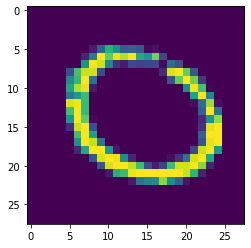

In [13]:
plt.imshow(r1)

In [16]:
r5=df.iloc[4,:-1].values.reshape(28,28)

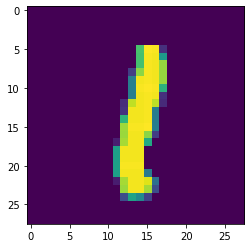

In [17]:
plt.imshow(r5)

In [ ]:
# first  Using PCA  Feature Selection (reduced Dimension ) / Supervised Classification

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['label'], random_state=0)

In [27]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Standardize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
X_train.shape

(3000, 784)

In [ ]:
# unsupervised Learning

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .90, random_state=0)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [37]:
pca.explained_variance_ratio_

array([0.18424366, 0.07643106, 0.0482044 , 0.04457445, 0.03181322,
       0.02357705, 0.0204468 , 0.01789126, 0.01716764, 0.01604015,
       0.01431689, 0.01418558, 0.01322667, 0.01241455, 0.01085504,
       0.01040137, 0.00982805, 0.0097074 , 0.00932717, 0.00908941,
       0.00879527, 0.00821304, 0.00782943, 0.00749912, 0.00744132,
       0.00723548, 0.00719782, 0.00675715, 0.00641965, 0.00627182,
       0.00621994, 0.00613447, 0.00601031, 0.00577567, 0.00569076,
       0.00543966, 0.0052991 , 0.00518093, 0.00497257, 0.00491284,
       0.00481153, 0.00466425, 0.0045772 , 0.00448417, 0.00438045,
       0.00430235, 0.00425852, 0.00414902, 0.00409266, 0.00401068,
       0.00396048, 0.00387127, 0.00384062, 0.00376869, 0.00373459,
       0.00368571, 0.00361095, 0.00356455, 0.00350577, 0.0034621 ,
       0.00342777, 0.0032998 , 0.00322804, 0.00316361, 0.00309267,
       0.0029886 , 0.00291291, 0.00286422, 0.0027588 , 0.00267113,
       0.00258536, 0.00253721, 0.00250222, 0.00244371, 0.00240

In [38]:
sum(pca.explained_variance_ratio_)

0.9003585667943117

In [39]:
pca.components_

array([[ 1.31833804e-18,  2.22044605e-16,  1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.47224281e-19, -2.77555756e-17,  1.72930247e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70561370e-18,  8.32667268e-17, -1.38777878e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.81362349e-17,  1.38777878e-17, -6.24500451e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.36321698e-18,  5.20417043e-17, -3.46944695e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.05531832e-17,  6.93889390e-18, -1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [40]:
pca.noise_variance_ 

0.07871366381654855

In [33]:
X_train.shape

(3000, 104)

In [34]:
X_test.shape

(1000, 104)

In [ ]:
# supervised Learning

In [35]:
from sklearn.linear_model import LogisticRegression
# Apply Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [36]:
# Get Model Performance
print(clf.score(X_test, y_test))

0.997


# pipe line

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#----------------------------------------
df = pd.read_csv('https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/data/MNISTonly0_1.csv')
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['label'], random_state=0)
# Create a pipeline
pipe = Pipeline([('scaler1', StandardScaler()),
                 ('pca1', PCA(n_components = .90, random_state=0)),
                 ('logistic1', LogisticRegression())])
model=pipe.fit(X_train, y_train)
model.score(X_test,y_test)

0.997

In [56]:
from sklearn.neighbors import KNeighborsClassifier
pipe2 = Pipeline([('scaler2', StandardScaler()),
                 ('pca2', PCA(n_components =.90, random_state=0)),
                 ('knnc', KNeighborsClassifier())])

In [57]:
knn_model=pipe2.fit(X_train, y_train)
knn_model.score(X_test,y_test)

0.997

### Visualize Pipeline

In [44]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('scaler1', StandardScaler()),
                ('pca1', PCA(n_components=0.9, random_state=0)),
                ('logistic1', LogisticRegression())])